# Use Only BOW  tech. 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("D:\\Downloadss\\kaggle data\\quora similar ques. task data\\train.csv")

In [10]:
df.shape

(404290, 6)

In [11]:
new_df = df.sample(30000)

In [12]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [13]:
new_df.duplicated().sum()

0

In [14]:
quest_newdf= new_df[['question1','question2']]

In [15]:
quest_newdf.head()

,question1,question2
57225,Which is the best site for fb status?,What is the best status on Facebook?
174790,How different are the driving laws in each sta...,At what age is it legal to get a tattoo in the...
348416,How should I improve my performance?,How can I improve the performance of my server?
201092,Package stuck for 5 months in New York ISC (US...,Does USPS deliver mail and packages to PO Boxes?
159157,How can I tell the difference between button-u...,What's the best way to hide an untucked shirt ...


In [16]:
from sklearn.feature_extraction.text import CountVectorizer


In [17]:
# mearge texts 

question = list(quest_newdf['question1']) + list(quest_newdf['question2'])

In [18]:
len(question)

60000

In [19]:
cv = CountVectorizer(max_features = 3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(question).toarray(),2)
# yaha hamne total 60000 question ko bich se(vertical) split karke 30000-30000 ke do part bna lie 

In [20]:
q1_arr.shape

(30000, 3000)

In [21]:
q2_arr.shape

(30000, 3000)

In [22]:
temp_df1 = pd.DataFrame(q1_arr, index = quest_newdf.index)
temp_df2 = pd.DataFrame(q2_arr, index =quest_newdf.index)
temp_df = pd.concat([temp_df1,temp_df2],axis = 1)


In [23]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [24]:
print(temp_df1.shape)
print(temp_df2.shape)
temp_df.shape

(30000, 3000)
(30000, 3000)


(30000, 6001)

In [25]:
temp_df


,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
57225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
348416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
350620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train , y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7386666666666667

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:\\Downloadss\\kaggle data\\quora similar ques. task data\\train.csv")

In [4]:
df.shape

(404290, 6)

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
new_df = df.sample(30000,random_state = 422)

In [7]:
new_df.shape

(30000, 6)

In [8]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [9]:
new_df.duplicated().sum()

0

is_duplicate
0    19011
1    10989
Name: count, dtype: int64
is_duplicate
0    63.37
1    36.63
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

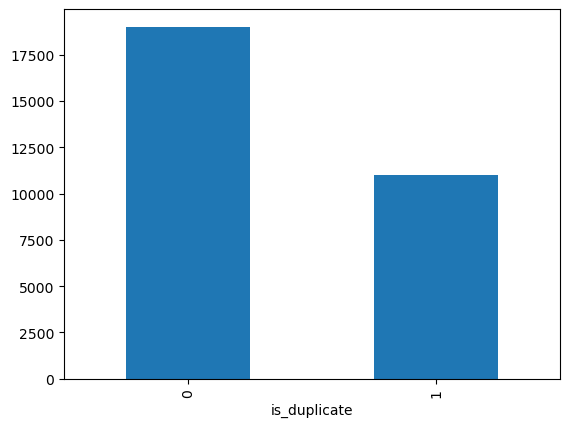

In [10]:
print(new_df['is_duplicate'].value_counts())
print(new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count()*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [11]:
qid = pd.Series(new_df['qid1'].tolist() +new_df['qid2'].tolist())
print("Number of unique question",np.unique(qid).shape[0])

x = qid.value_counts()>1
print("Number of question getting repeated",x[x].shape[0])

Number of unique question 55311
Number of question getting repeated 3389


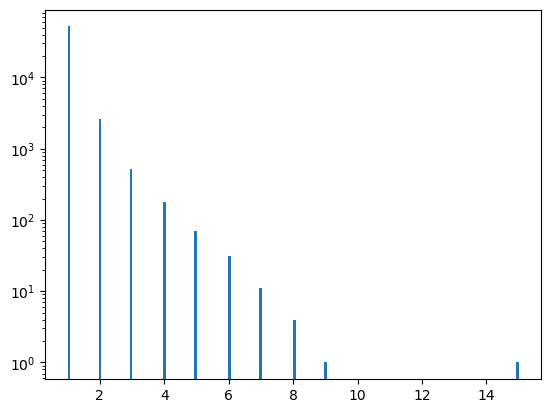

In [12]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [13]:
new_df['q1_len'] = new_df['question1'].str.len()

In [14]:
new_df['q2_len'] = new_df['question2'].apply(lambda x: len(x))

In [15]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
124193,124193,200601,200602,My former employer withheld money for my taxes...,How can I find out how much I owe the IRS?,0,131,42
226610,226610,335257,335258,How do I clone a hard drive?,What's the easiest way to clone a PC hard drive?,0,28,48
302440,302440,26685,173210,If PM Modi wants to curb black money? Why was ...,How will the introduction of new 2000 rupee no...,1,81,82
135203,135203,215968,215969,Why do we need to be social?,Do we need to be social?,1,28,24
386275,386275,518468,518469,What it is being of your age?,What is it like to be your age?,1,29,31


In [16]:
# add new colum => count of words of question 1
new_df['q1_num_words'] = new_df['question1'].apply(lambda x :x.split()).apply(lambda y: len(y))

In [17]:
new_df['q2_num_words'] = new_df['question2'].apply(lambda x:len(x.split()))

In [18]:
new_df.shape

(30000, 10)

In [19]:
def common_words(row):
    w1 = set(map(lambda word:word.lower().strip(),row["question1"].split(" ")))
    w2 = set(map(lambda word:word.lower().strip(),row["question2"].split(" ")))
    return len(w1 & w2)

In [20]:
new_df['word_common'] = new_df.apply(common_words ,axis =1)

In [21]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
124193,124193,200601,200602,My former employer withheld money for my taxes...,How can I find out how much I owe the IRS?,0,131,42,26,11,3
226610,226610,335257,335258,How do I clone a hard drive?,What's the easiest way to clone a PC hard drive?,0,28,48,7,10,4
302440,302440,26685,173210,If PM Modi wants to curb black money? Why was ...,How will the introduction of new 2000 rupee no...,1,81,82,16,15,6
135203,135203,215968,215969,Why do we need to be social?,Do we need to be social?,1,28,24,7,6,6
386275,386275,518468,518469,What it is being of your age?,What is it like to be your age?,1,29,31,7,8,5


In [22]:
def total_word(row):
    w1 = set(map(lambda x: x.lower().strip() , row['question1'].split(" ")))
    w2 = set(map(lambda x: x.lower().strip() , row['question2'].split(" ")))
    return (len(w1) +len(w2))

In [23]:
new_df['word_total'] = new_df.apply(total_word , axis = 1)

In [24]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)

In [25]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
124193,124193,200601,200602,My former employer withheld money for my taxes...,How can I find out how much I owe the IRS?,0,131,42,26,11,3,31,0.10
226610,226610,335257,335258,How do I clone a hard drive?,What's the easiest way to clone a PC hard drive?,0,28,48,7,10,4,17,0.24
302440,302440,26685,173210,If PM Modi wants to curb black money? Why was ...,How will the introduction of new 2000 rupee no...,1,81,82,16,15,6,30,0.20
135203,135203,215968,215969,Why do we need to be social?,Do we need to be social?,1,28,24,7,6,6,13,0.46
386275,386275,518468,518469,What it is being of your age?,What is it like to be your age?,1,29,31,7,8,5,15,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123636,123636,199846,199847,Why wouldn't Google Chrome possibly respond?,Why is Google Chrome always not responding?,1,44,43,6,7,3,13,0.23
385535,385535,517681,354653,Do you feel empowered or cowardly when you car...,How often do you feel insecure due to the fact...,0,55,101,11,22,4,31,0.13
166723,166723,258633,258634,After all the hype that Indian media has creat...,Pakistan defence minister commented today that...,0,136,148,25,24,6,45,0.13
387127,387127,349100,372994,How can we improve our education system?,What should be done to improve our education s...,1,40,52,7,9,4,16,0.25


D:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Minimum  Characters : 1
Maximum characters  : 391
average num of chracters 59


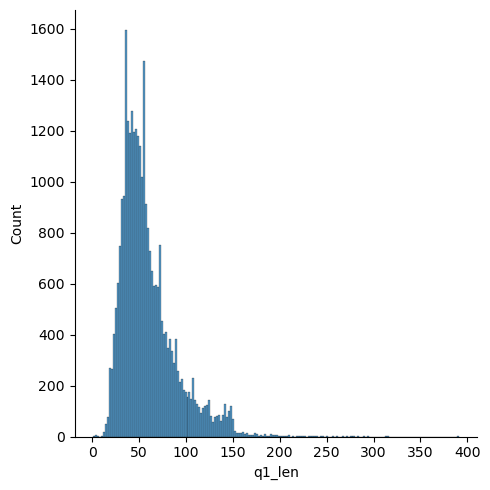

In [26]:
sns.displot(new_df['q1_len'])
print('Minimum  Characters :',new_df['q1_len'].min())
print('Maximum characters  :',new_df['q1_len'].max())
print('average num of chracters',int(new_df['q1_len'].mean()))

D:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Minimum characters : 1
Maximum characters : 1151
average num of characters 60


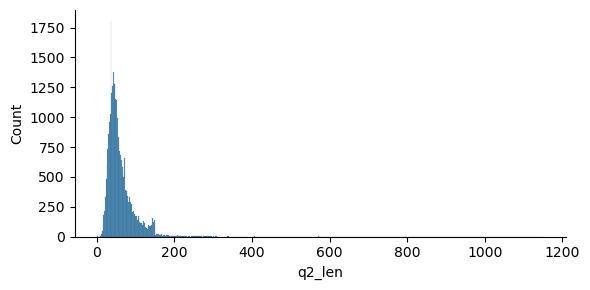

In [27]:
sns.displot(new_df['q2_len'], height=3, aspect=2)
print("Minimum characters :",new_df['q2_len'].min())
print("Maximum characters :",new_df['q2_len'].max())
print("average num of characters",int(new_df['q2_len'].mean()))

D:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Minimum words : 1
Maximum words : 72
Average Num Of Words : 10


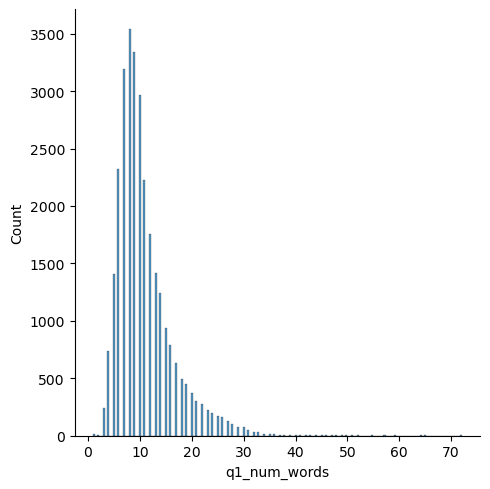

In [28]:
sns.displot(new_df['q1_num_words'])
print("Minimum words :", new_df['q1_num_words'].min())
print("Maximum words :",new_df['q1_num_words'].max())
print("Average Num Of Words :" ,int(new_df['q1_num_words'].mean()))

D:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


minimum words : 1
maxmum words : 237
average num of words : 11


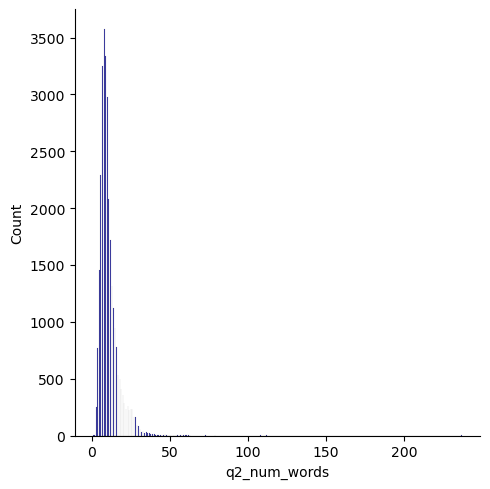

In [29]:
dark_color = 'darkblue'

sns.displot(new_df['q2_num_words'], color=dark_color)
print("minimum words :",new_df['q2_num_words'].min())
print("maxmum words :",new_df['q2_num_words'].max())
print("average num of words :",int(new_df['q2_num_words'].mean()))

D:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


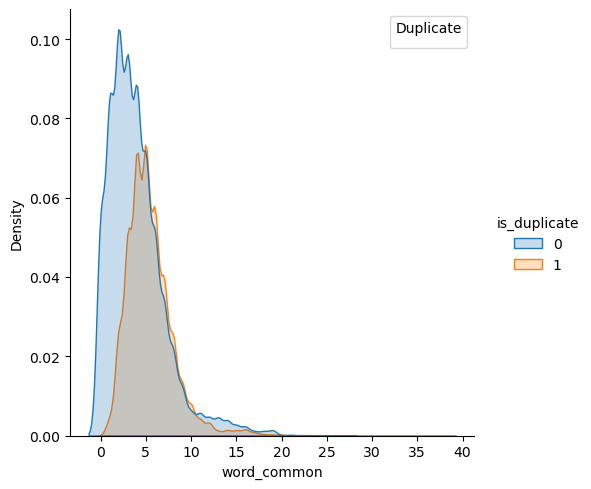

In [39]:
sns.displot(data=new_df, x='word_common', hue='is_duplicate',kind='kde', fill=True)
plt.legend(title='Duplicate')
plt.show()


D:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


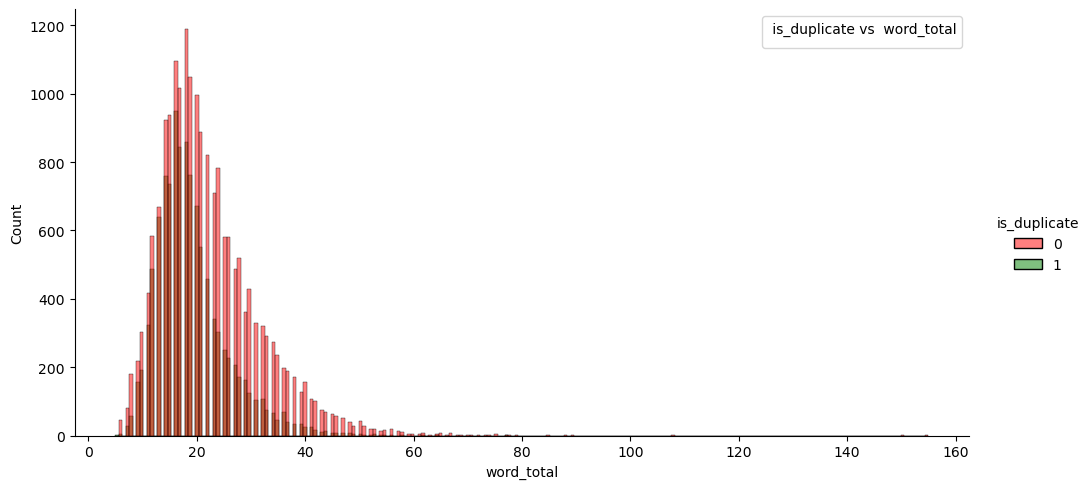

In [57]:
sns.displot(data = new_df , x = 'word_total' , hue = 'is_duplicate',palette=["red","green"],kde_kws={"linewidth": 4},aspect = 2, fill = True)
plt.legend(title = " is_duplicate vs  word_total")
plt.show()


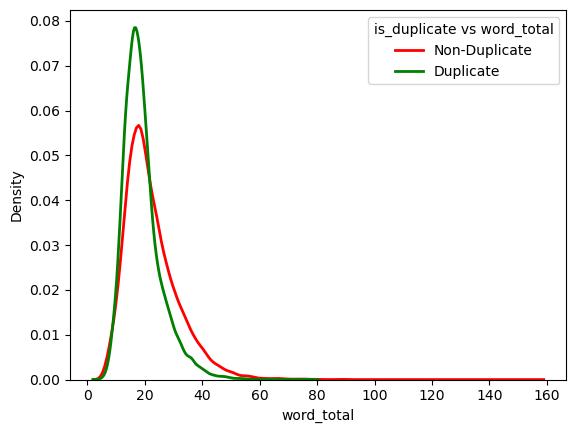

In [60]:
# same upr vala graph h bt in clear 
sns.kdeplot(data=new_df[new_df['is_duplicate'] == 0]['word_total'], color="red", linewidth=2, label="Non-Duplicate")
sns.kdeplot(data=new_df[new_df['is_duplicate'] == 1]['word_total'], color="green", linewidth=2, label="Duplicate")

plt.legend(title="is_duplicate vs word_total")
plt.show()

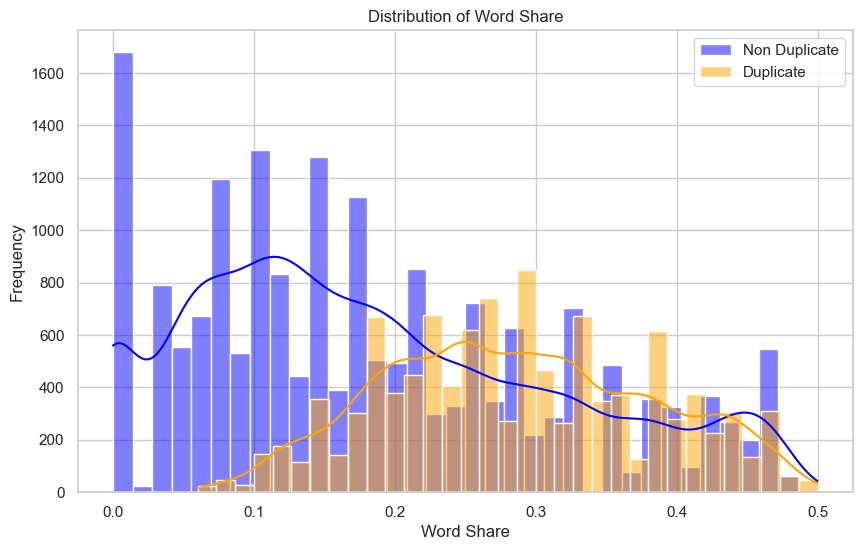

In [72]:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting the distribution of 'word_share' for non-duplicate
sns.histplot(new_df[new_df['is_duplicate'] == 0]['word_share'], color='blue', label='Non Duplicate', kde=True)

# Plotting the distribution of 'word_share' for duplicate
sns.histplot(new_df[new_df['is_duplicate'] == 1]['word_share'], color='orange', label='Duplicate', kde=True)
7
# Adding a line indicating the mean or median
# non_duplicate_mean = new_df[new_df['is_duplicate'] == 0]['word_share'].mean()
# duplicate_mean = new_df[new_df['is_duplicate'] == 1]['word_share'].mean()

# plt.axvline(x=non_duplicate_mean, color='blue', linestyle='--', label='Non Duplicate Mean')
# plt.axvline(x=duplicate_mean, color='orange', linestyle='--', label='Duplicate Mean')

plt.title('Distribution of Word Share')
plt.xlabel('Word Share')
plt.ylabel('Frequency')
plt.legend()

plt.show()


In [73]:
ques_df =  new_df[["question1" , "question2"]]
ques_df.head()

,question1,question2
124193,My former employer withheld money for my taxes...,How can I find out how much I owe the IRS?
226610,How do I clone a hard drive?,What's the easiest way to clone a PC hard drive?
302440,If PM Modi wants to curb black money? Why was ...,How will the introduction of new 2000 rupee no...
135203,Why do we need to be social?,Do we need to be social?
386275,What it is being of your age?,What is it like to be your age?


In [74]:
final_df = new_df.drop(columns = ['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
124193,0,131,42,26,11,3,31,0.10
226610,0,28,48,7,10,4,17,0.24
302440,1,81,82,16,15,6,30,0.20
135203,1,28,24,7,6,6,13,0.46
386275,1,29,31,7,8,5,15,0.33


In [82]:
from sklearn.feature_extraction.text import CountVectorizer
question = list(ques_df['question1'])+list(ques_df['question2'])

cv = CountVectorizer(max_features= 3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(question).toarray(),2)

In [85]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index =ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis = 1)
temp_df.shape

(30000, 6000)

In [88]:
final_df = pd.concat([final_df,temp_df],axis = 1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
124193,0,131,42,26,11,3,31,0.10,0,0,...,0,0,0,0,0,0,0,0,0,0
226610,0,28,48,7,10,4,17,0.24,0,0,...,0,0,0,0,0,0,0,0,0,0
302440,1,81,82,16,15,6,30,0.20,0,0,...,0,0,0,0,0,0,0,0,0,0
135203,1,28,24,7,6,6,13,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
386275,1,29,31,7,8,5,15,0.33,0,0,...,0,0,0,0,0,1,0,0,0,0


In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(final_df.iloc[:,1:].values, final_df.iloc[:,0].values,test_size=0.2,random_state=433)

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7756666666666666

In [6]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xgboost (from versions: none)
ERROR: No matching distribution found for xgboost


In [1]:
from xgboost import xGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
accuracy_score(y_test,y_pred)
 # it give error  bcz xgboost cant install

ModuleNotFoundError: No module named 'xgboost'

###  we will add some new  magic feature like :
    1.Token Features
    2. Length Based Feature
    3. Fuzzy Feature